# Playground

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import torch

from messenger_dataset import MessengerDataset
from torchmetrics import Metric

Class name mapping

In [2]:
label_names = {
    0: "IMF",
    1: "BS crossing",
    2: "magnetosheath",
    3: "MP crossing",
    4: "magnetosphere"
}

Data preprocessing test

In [3]:
d = MessengerDataset("merged/df_train.csv", window_size=7)

In [4]:
print(len(d))

7494690


In [5]:
sample, label = d[32246]
print(sample)
print(label)

tensor([[[-0.0497,  0.5086, -0.0392],
         [-0.6225, -0.9016, -0.7356],
         [ 0.8376, -0.8421, -0.8406]],

        [[-0.1362,  0.4713, -0.0584],
         [-0.6224, -0.9014, -0.7357],
         [ 0.8376, -0.8421, -0.8407]],

        [[-0.1235,  0.4795, -0.0536],
         [-0.6222, -0.9013, -0.7358],
         [ 0.8376, -0.8421, -0.8404]],

        [[-0.0702,  0.4979, -0.0190],
         [-0.6221, -0.9012, -0.7359],
         [ 0.8376, -0.8421, -0.8401]],

        [[-0.1271,  0.5556, -0.0477],
         [-0.6219, -0.9010, -0.7360],
         [ 0.8376, -0.8421, -0.8406]],

        [[-0.1310,  0.5856, -0.2340],
         [-0.6217, -0.9009, -0.7361],
         [ 0.8376, -0.8421, -0.8398]],

        [[-0.0788,  0.6225, -0.1684],
         [-0.6216, -0.9008, -0.7362],
         [ 0.8376, -0.8421, -0.8406]]], dtype=torch.float64)
tensor([[0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 1, 0,

Orbit length inspection

In [6]:
df = pd.read_csv("merged/df_train.csv")

In [7]:
g = df.groupby("ORBIT").size()
print(f"max deviation: {g.max() - g.min()}")
g.describe()

max deviation: 1361


count      178.000000
mean     43271.623596
std        390.995916
min      42105.000000
25%      43455.000000
50%      43460.000000
75%      43461.750000
max      43466.000000
dtype: float64

Compare label values at cutoff index

In [8]:
cutoff_index = g.min() - 1
occuring_labels = set()

for orbit in df["ORBIT"].unique():
    occuring_labels.add(df[df["ORBIT"] == orbit].iloc[cutoff_index]["LABEL"])

print("Occuring labels at cutoff index:", occuring_labels)

Occuring labels at cutoff index: {0}


Sanity check

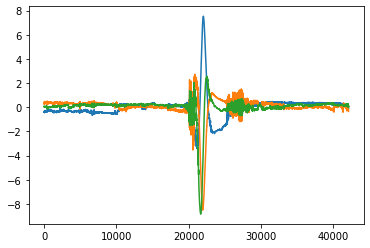

In [9]:
o = df[df["ORBIT"] == 42].reset_index().iloc[:cutoff_index]
plt.plot(o["BX_MSO"])
plt.plot(o["BY_MSO"])
plt.plot(o["BZ_MSO"])